In [1]:
%matplotlib inline
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [5]:
table = Table.read('data/HAT-P-11_ATLAS2_919509646_0000.txt', format='ascii', header_start=1, data_start=3)

Table column definitions [here](http://dasch.rc.fas.harvard.edu/database.php#variables)

In [11]:
from astropy.time import Time
t = Time(table['Date'], format='jd')

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


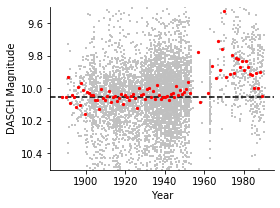

In [67]:
from astropy.timeseries import TimeSeries, aggregate_downsample
import astropy.units as u

ts = TimeSeries(table[['magcal_local']], time=t)

plt.figure(figsize=(4, 3))

binned = aggregate_downsample(ts, time_bin_size=1*u.year, aggregate_func=np.nanmedian)

mask = table['magcal_local_error'] < 1

plt.scatter(t.decimalyear[mask], table['magcal_local'][mask], color='silver', marker=',', s=1)

plt.axhline(np.median(binned['magcal_local'][:-50]), ls='--', color='k')

plt.scatter(Time(binned['time_bin_start'], format='jd').decimalyear, binned['magcal_local'], color='r', zorder=10, s=5)

ax = plt.gca()

for s in ['right', 'top']: 
    ax.spines[s].set_visible(False)

ax.invert_yaxis()
plt.ylim([10.5, 9.5])
ax.set(xlabel='Year', ylabel='DASCH Magnitude')
plt.savefig('plots/dasch.pdf', bbox_inches='tight')